<a href="https://colab.research.google.com/github/DenisseUrenda/MachineLearning/blob/main/L10_Arboles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arboles de decision

https://scikit-learn.org/stable/modules/tree.html

Los arboles de decicion son metdos de aprendizaje supervisado no parametrico usado para clasificacion y regresion. El objetivo es crear un modelo que prediga el valor de una variable de respuesta aprendiendo simples reglas de decision inferidas de las variables del conjunto.

Ventajas:
- Simples de entender e interpretar
- Requiere poca preparacion de datos
- Se puede usar variables numericas y categoricas
- Es posible validar el modelo usando pruebas estadisticas
- Su desempeno es bueno incluso si las suposiciones no se cumplen

Desventajas:
- Pueden sufrir de sobreajuste
- Arboles de decision pueden ser inestables (pequenos cambios en los datos pueden generar resultados muy distintos)
- Las predicciones no son continuas. Por lo que nos on buenos para extrapolacion


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

In [ ]:
path = 'https://gist.githubusercontent.com/javierIA/403a1027bd6894f865a508652c338d20/raw/fd09d4255ce0ef4ab01eb6a5144c6c887f72045c/datos'
df = pd.read_csv(path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  711 non-null    int64  
 1   Survived     711 non-null    int64  
 2   Pclass       711 non-null    int64  
 3   Name         711 non-null    object 
 4   Sex          711 non-null    object 
 5   Age          711 non-null    float64
 6   SibSp        711 non-null    int64  
 7   Parch        711 non-null    int64  
 8   Ticket       711 non-null    object 
 9   Fare         711 non-null    float64
 10  Cabin        182 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.8+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000
mean,448.483826,0.403657,2.241913,29.621899,0.514768,0.431786,34.534323
std,258.849806,0.490976,0.836147,14.493108,0.931147,0.854517,52.968619
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,444.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.550000
75%,677.500000,1.000000,3.000000,38.000000,1.000000,1.000000,32.750000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [ ]:
# Cambiando variables categoricas a nnumericas
# male = 1, female = 0

df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

In [ ]:
data = df[['Sex_male','Fare','Age','Pclass','SibSp','Survived']]
data.head()

,Sex_male,Fare,Age,Pclass,SibSp,Survived
0,1,7.2500,22.0,3,1,0
1,0,71.2833,38.0,1,1,1
2,0,7.9250,26.0,3,0,1
3,0,53.1000,35.0,1,1,1
4,1,8.0500,35.0,3,0,0


In [ ]:
from sklearn.model_selection import train_test_split

X = data.iloc[:,:-1]
y = data.Survived

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.25)

In [ ]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.8033707865168539

In [ ]:
import graphviz

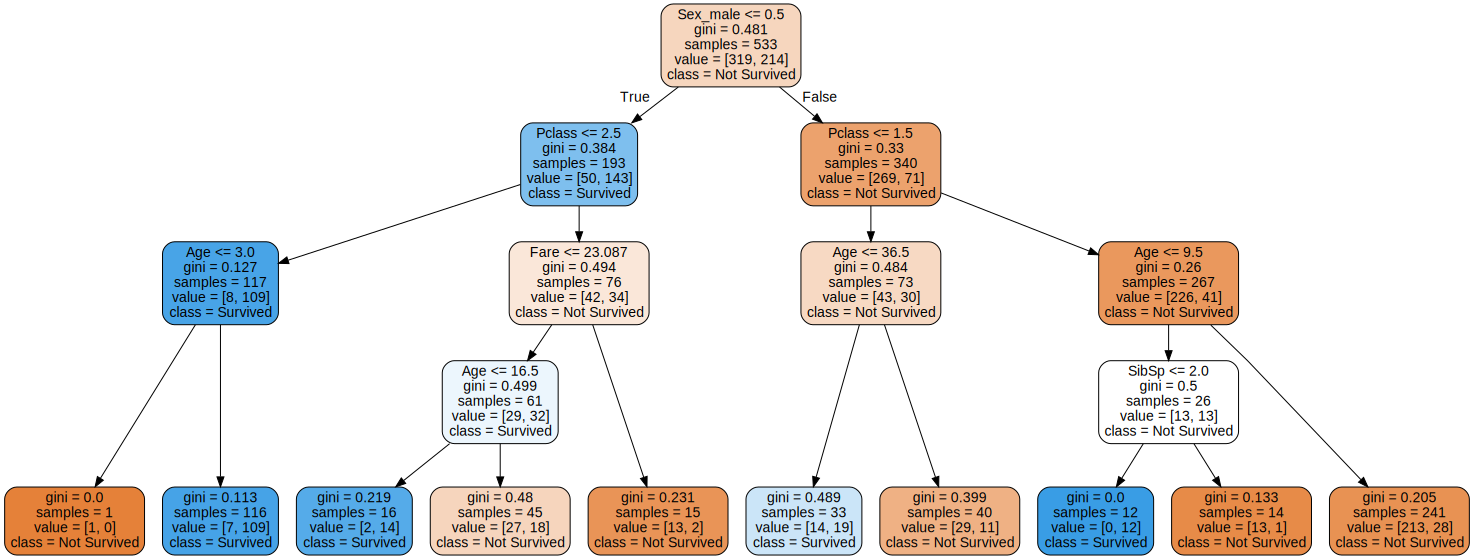

In [ ]:
dot = tree.export_graphviz(clf, out_file=None, feature_names=X.columns,
                     class_names = ['Not Survived', 'Survived'],
                     filled=True, rounded=True, leaves_parallel=True)
graphviz.Source(dot)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[96,  9],
       [26, 47]])

[Text(0.5, 0.9, 'Sex_male <= 0.5\ngini = 0.481\nsamples = 533\nvalue = [319, 214]\nclass = Not Survived'),
 Text(0.25, 0.7, 'Pclass <= 2.5\ngini = 0.384\nsamples = 193\nvalue = [50, 143]\nclass = Survived'),
 Text(0.125, 0.5, 'Age <= 3.0\ngini = 0.127\nsamples = 117\nvalue = [8, 109]\nclass = Survived'),
 Text(0.0625, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Not Survived'),
 Text(0.1875, 0.3, 'gini = 0.113\nsamples = 116\nvalue = [7, 109]\nclass = Survived'),
 Text(0.375, 0.5, 'Fare <= 23.087\ngini = 0.494\nsamples = 76\nvalue = [42, 34]\nclass = Not Survived'),
 Text(0.3125, 0.3, 'Age <= 16.5\ngini = 0.499\nsamples = 61\nvalue = [29, 32]\nclass = Survived'),
 Text(0.25, 0.1, 'gini = 0.219\nsamples = 16\nvalue = [2, 14]\nclass = Survived'),
 Text(0.375, 0.1, 'gini = 0.48\nsamples = 45\nvalue = [27, 18]\nclass = Not Survived'),
 Text(0.4375, 0.3, 'gini = 0.231\nsamples = 15\nvalue = [13, 2]\nclass = Not Survived'),
 Text(0.75, 0.7, 'Pclass <= 1.5\ngini = 0.33\nsamples = 34

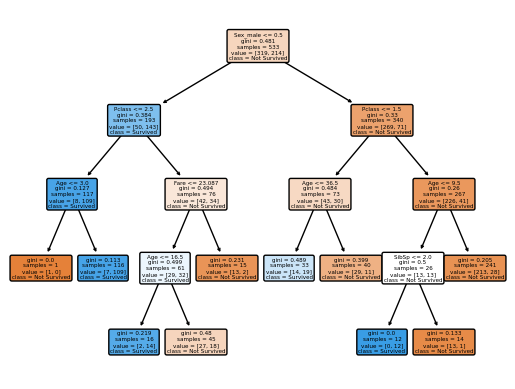

In [ ]:
tree.plot_tree(clf, feature_names=X.columns,
                     class_names = ['Not Survived', 'Survived'],
                     filled=True, rounded=True)